In [1]:
import spacepy.pycdf as pycdf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [ ]:
L1_AUX = pycdf.CDF('cdf_data/20250621/AL1_ASW91_L1_AUX_20250621_UNP_9999_999999_V01.cdf')
L1_TH1 = pycdf.CDF("cdf_data/20250621/AL1_ASW91_L1_TH1_20250621_UNP_9999_999999_V01.cdf")
L1_TH2 = pycdf.CDF('cdf_data/20250621/AL1_ASW91_L1_TH2_20250621_UNP_9999_999999_V01.cdf')
L2_BLK = pycdf.CDF('cdf_data/20250621/AL1_ASW91_L2_BLK_20250621_UNP_9999_999999_V02.cdf')
L2_TH1 = pycdf.CDF('cdf_data/20250621/AL1_ASW91_L2_TH1_20250621_UNP_9999_999999_V02.cdf')
L2_TH2 = pycdf.CDF('cdf_data/20250621/AL1_ASW91_L2_TH2_20250621_UNP_9999_999999_V02.cdf')

In [ ]:
def prepare_data(image_path):
        image_data = pycdf.CDF(image_path)
        if 'L1_AUX' in image_path:
            df = pd.DataFrame({
                'epoch_for_cdf': image_data['epoch_for_cdf'][:, 0],
                'trig_counts': image_data['trig_counts'][:, 0, 0, 0],
                'coin_trig_counts': image_data['coin_trig_counts'][:, 0, 0],
                'coinc_trig_count_total': image_data['coinc_trig_count_total'][:, 0],
                'angle_tha1': image_data['angle_tha1'][:, 0, 0],
                'angle_tha2': image_data['angle_tha2'][:, 0, 0],
                'angle_xgse': image_data['angle_xgse'][:],
                'angle_ygse': image_data['angle_ygse'][:],
                'angle_zgse': image_data['angle_zgse'][:],
                'peak_det_counts': image_data['peak_det_counts'][:, 0, 0],
                'rej_counts': image_data['rej_counts'][:, 0, 0],
                'obs_time': image_data['obs_time'][:, 0],
                'spacecraft_xpos': image_data['spacecraft_xpos'][:],
                'spacecraft_xvel': image_data['spacecraft_xvel'][:],
                'spacecraft_ypos': image_data['spacecraft_ypos'][:],
                'spacecraft_yvel': image_data['spacecraft_yvel'][:],
                'spacecraft_zpos': image_data['spacecraft_zpos'][:],
                'spacecraft_zvel': image_data['spacecraft_zvel'][:]
            })
            return df

        elif 'L1_TH1' in image_path:
            df = pd.DataFrame({
                'epoch_for_cdf': image_data['epoch_for_cdf'][:, 0],
                'obs_time': image_data['obs_time'][:, 0],
                'THA-1_spec': image_data['THA-1_spec'],
                'fpga_ticks': image_data['fpga_ticks'],
                'frame_num': image_data['frame_num']
            })
            return df

        elif 'L2_BLK' in image_path:
            df = pd.DataFrame({
                'time': pd.to_datetime(image_data['epoch_for_cdf_mod'][:], unit='ms'),
                'proton_bulk_speed': image_data['proton_bulk_speed'][:],
                'alpha_bulk_speed': image_data['alpha_bulk_speed'][:],
                'alpha_density': image_data['alpha_density'][:],
                'alpha_thermal': image_data['alpha_thermal'][:],
                'proton_density': image_data['proton_density'][:],
                'proton_thermal': image_data['proton_thermal'][:],
                'proton_xvelocity': image_data['proton_xvelocity'][:],
                'proton_yvelocity': image_data['proton_yvelocity'][:],
                'proton_zvelocity': image_data['proton_zvelocity'][:],
                'spacecraft_xpos': image_data['spacecraft_xpos'][:],
                'spacecraft_ypos': image_data['spacecraft_ypos'][:],
                'spacecraft_zpos': image_data['spacecraft_zpos'][:]
            })
            return df

        elif 'L1_TH2' in image_path:
            df = pd.DataFrame({
                'epoch': image_data['epoch_for_cdf'][:, 0],
                'obs_time': image_data['obs_time'][:, 0],
                'fpga_ticks': image_data['fpga_ticks'][:],
                'frame_num': image_data['frame_num'][:],
                'tha2_spec': image_data['THA-2_spec'][:],
            })
            return df

        elif 'L2_TH1' in image_path:
            df = pd.DataFrame({
                'epoch': pd.to_datetime(image_data['epoch_for_cdf_mod'][:], unit='ms'),
                'spacecraft_xpos': image_data['spacecraft_xpos'][:],
                'spacecraft_ypos': image_data['spacecraft_ypos'][:],
                'spacecraft_zpos': image_data['spacecraft_zpos'][:]
            })

            # Energy bins
            energy_bins = image_data['energy_center_mod'][:]
            for i in range(energy_bins.shape[1]):
                df[f'flux_mod_E{i}'] = image_data['integrated_flux_mod'][:, i]
                df[f'flux_s9_E{i}'] = image_data['integrated_flux_s9_mod'][:, i]
                df[f'flux_s10_E{i}'] = image_data['integrated_flux_s10_mod'][:, i]
                df[f'flux_s11_E{i}'] = image_data['integrated_flux_s11_mod'][:, i]

            # Optional: flatten sun_angle_tha1 (16 sectors × 3 components)
            sun_angle = image_data['sun_angle_tha1'][:]  # shape: [N, 16, 3]
            for sector in range(sun_angle.shape[1]):
                for comp in range(3):
                    df[f'sun_angle_s{sector}_c{comp}'] = sun_angle[:, sector, comp]

            return df
        elif 'L2_TH2' in image_path:
            df = pd.DataFrame({
                'epoch': pd.to_datetime(image_data['epoch_for_cdf_mod'][:], unit='ms'),
                'spacecraft_xpos': image_data['spacecraft_xpos'][:],
                'spacecraft_ypos': image_data['spacecraft_ypos'][:],
                'spacecraft_zpos': image_data['spacecraft_zpos'][:]
            })

            # Energy bins
            energy_bins = image_data['energy_center_mod'][:]
            for i in range(energy_bins.shape[1]):
                df[f'flux_mod_E{i}'] = image_data['integrated_flux_mod'][:, i]
                df[f'flux_s15_E{i}'] = image_data['integrated_flux_s15_mod'][:, i]
                df[f'flux_s16_E{i}'] = image_data['integrated_flux_s16_mod'][:, i]
                df[f'flux_s17_E{i}'] = image_data['integrated_flux_s17_mod'][:, i]
                df[f'flux_s18_E{i}'] = image_data['integrated_flux_s18_mod'][:, i]
                df[f'flux_s19_E{i}'] = image_data['integrated_flux_s19_mod'][:, i]

            # Flatten sun_angle_tha2: [time, 32 sectors, 3 components]
            sun_angle = image_data['sun_angle_tha2'][:]
            for sector in range(sun_angle.shape[1]):
                for comp in range(3):
                    df[f'sun_angle_s{sector}_c{comp}'] = sun_angle[:, sector, comp]

            return df

        else:
            return None


In [12]:
sample_data_01 = prepare_data('cdf_data/20250621/AL1_ASW91_L2_BLK_20250621_UNP_9999_999999_V02.cdf')

In [13]:
sample_data_01

,time,proton_bulk_speed,alpha_bulk_speed,alpha_density,alpha_thermal,proton_density,proton_thermal,proton_xvelocity,proton_yvelocity,proton_zvelocity,spacecraft_xpos,spacecraft_ypos,spacecraft_zpos
0,2025-06-21 00:00:27.241,5.278118e+02,5.277175e+02,2.129289e-02,7.061646e+01,4.728935e-01,5.811940e+01,-5.278118e+02,40.998300,74.362111,1.273305e+06,-53303.976497,-106259.083118
1,2025-06-21 00:00:32.241,5.316419e+02,5.304577e+02,2.381133e-02,7.468554e+01,5.853984e-01,6.066030e+01,-5.316419e+02,50.764305,75.093527,1.273305e+06,-53302.489909,-106259.097312
2,2025-06-21 00:00:37.241,5.223615e+02,5.236657e+02,1.844540e-02,7.902136e+01,3.528019e-01,5.421125e+01,-5.223615e+02,60.206399,78.753785,1.273305e+06,-53301.003230,-106259.111507
3,2025-06-21 00:00:42.241,5.172195e+02,5.149521e+02,2.230880e-02,8.429529e+01,3.733669e-01,6.022701e+01,-5.172195e+02,42.802706,75.764355,1.273306e+06,-53299.516581,-106259.125700
4,2025-06-21 00:00:47.241,5.114079e+02,5.092423e+02,1.926183e-02,7.682361e+01,3.762946e-01,5.358589e+01,-5.114079e+02,41.228391,68.502695,1.273306e+06,-53298.029960,-106259.139893
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17270,2025-06-21 23:59:38.026,-1.000000e+31,-1.000000e+31,-1.000000e+31,-1.000000e+31,-1.000000e+31,-1.000000e+31,-1.000000e+31,-4.844595,25.853663,1.274103e+06,-27500.337479,-106419.388918
17271,2025-06-21 23:59:43.027,-1.000000e+31,-1.000000e+31,-1.000000e+31,-1.000000e+31,-1.000000e+31,-1.000000e+31,-1.000000e+31,-5.110272,30.083116,1.274103e+06,-27498.836489,-106419.393319
17272,2025-06-21 23:59:48.027,-1.000000e+31,-1.000000e+31,-1.000000e+31,-1.000000e+31,-1.000000e+31,-1.000000e+31,-1.000000e+31,0.493213,35.987634,1.274103e+06,-27497.335557,-106419.397719
17273,2025-06-21 23:59:53.027,-1.000000e+31,-1.000000e+31,-1.000000e+31,-1.000000e+31,-1.000000e+31,-1.000000e+31,-1.000000e+31,-8.036967,25.808357,1.274103e+06,-27495.834595,-106419.402119


In [16]:
import pandas as pd
import matplotlib.pyplot as plt

def detect_cme_event(df):
    """
    Basic CME event detector from solar wind plasma data.
    Input:
        df: pandas DataFrame with L2_BLK data fields.
    Output:
        Plots highlighting potential CME passage.
    """
    time = pd.to_datetime(df['time'], unit='ms')  # Convert epoch to datetime

    # Plot key plasma parameters
    fig, axs = plt.subplots(4, 1, figsize=(20, 10), sharex=True)

    axs[0].plot(time, df['proton_bulk_speed'], label='Proton Bulk Speed (km/s)', color='orange')
    axs[0].set_ylabel('Speed (km/s)')
    axs[0].legend()

    axs[1].plot(time, df['proton_density'], label='Proton Density (cm⁻³)', color='green')
    axs[1].set_ylabel('Density')
    axs[1].legend()

    axs[2].plot(time, df['proton_thermal'], label='Proton Thermal Velocity (km/s)', color='red')
    axs[2].set_ylabel('Thermal')
    axs[2].legend()

    # Alpha-to-proton density ratio
    alpha_ratio = df['alpha_density'] / (df['proton_density'] + 1e-5)
    axs[3].plot(time, alpha_ratio, label='Alpha-to-Proton Ratio', color='blue')
    axs[3].set_ylabel('α/p Ratio')
    axs[3].axhline(0.08, linestyle='--', color='gray', label='CME Threshold')
    axs[3].legend()

    plt.xlabel('Time')
    plt.suptitle('CME Detection via Solar Wind Plasma Signatures')
    plt.tight_layout()
    plt.show()

# Example usage:
# df = prepare_data('path/to/your/L2_BLK_file.cdf')
# detect_cme_event(df)

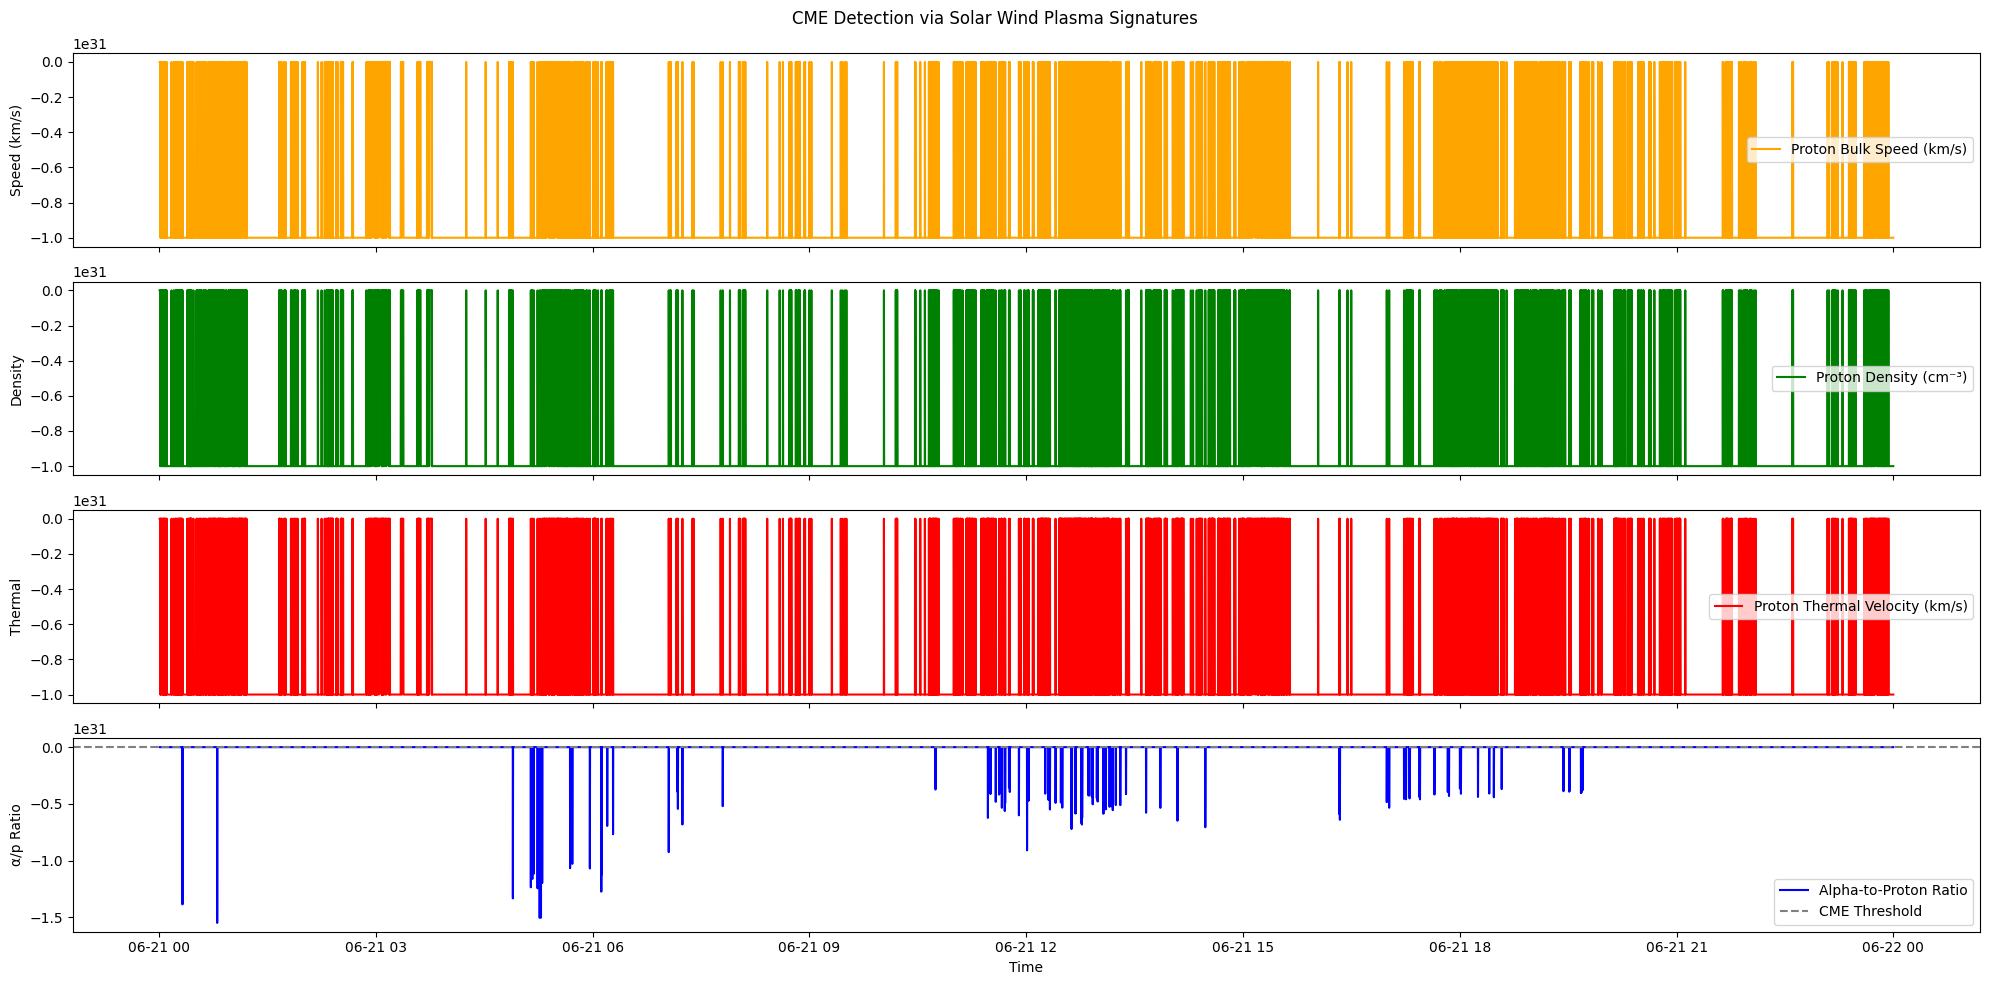

In [17]:
detect_cme_event(sample_data_01)

threshold = μ + k·σ

In [19]:
# assume df is the DataFrame returned by your prepare_data()
flux = sample_data_01['trig_counts']
μ, σ = flux.mean(), flux.std()
k = 3
threshold = μ + k * σ
threshold

KeyError: 'trig_counts'